## UNIVARIATE STATISTICS

### Authors
 Ndèye Gagnessiry Ndiaye and Christin Seifert  
 
### License
This work is licensed under the Creative Commons Attribution 3.0 Unported License https://creativecommons.org/licenses/by/3.0/ 

This notebook:

- Calculates basic statistics (mean, mode, IQR, var).
- Interpretes box plot and histograms for univariate distributions.
- Visually compares box plots and interpret the findings.
- Interpretes quantile-quantile plots.
- Identifies the pros and cons of box plots vs. histograms.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import statistics
from statistics import variance
from pylab import *

## Basic Statistics

In [2]:
dataset = np.array([5.2, 4.3,2.7,5.0,6.2,4.2,6.3,5.4])

We calculate basic statistics (mean, min, max, IQR, variance) for this data set.

In [3]:
metric_list = ["Min", "Mean", "1st Qu.","Median","3rd Qu.","Max","Variance"]
set_list = ["Statistics"]
data = np.array([min(dataset),mean(dataset),np.percentile(dataset,25) ,np.percentile(dataset,50),np.percentile(dataset,75), max(dataset),variance(dataset)])
pandas.DataFrame(data,metric_list, set_list)

,Statistics
Min,2.700000
Mean,4.912500
1st Qu.,4.275000
Median,5.100000
3rd Qu.,5.600000
Max,6.300000
Variance,1.384107


In [4]:
#Interquartile range
print ("Interquartile range (IQR) =",np.percentile(dataset,75) - np.percentile(dataset,25)  )

Interquartile range (IQR) = 1.325


We draw the box plot for this data set.

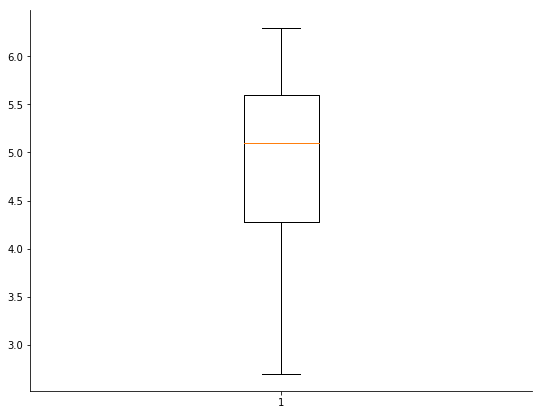

In [5]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# Create the boxplot
bp = ax.boxplot(dataset)
plt.show()

The following figure shows three histograms, one with a bin size of 0.5, one with 1 and another one with a bin size of 2. 

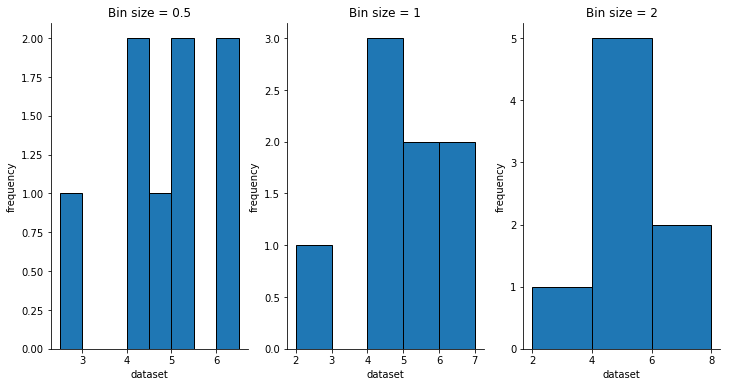

In [6]:
fig = plt.figure(figsize=(12,6))

# bin size=0.5
ax = fig.add_subplot(131)
ax.hist(dataset,bins= np.arange(2.5,7,0.50005), edgecolor = 'black')
plt.xlabel('dataset')
plt.ylabel('frequency')
plt.title('Bin size = 0.5')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.get_xaxis().tick_bottom()   # remove unneeded ticks 
ax.get_yaxis().tick_left()

# bin size=1
ax = fig.add_subplot(132)
ax.hist(dataset,bins= np.arange(2,8,1.0005), edgecolor = 'black')
plt.xlabel('dataset')
plt.ylabel('frequency')
plt.title('Bin size = 1')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.get_xaxis().tick_bottom()   # remove unneeded ticks 
ax.get_yaxis().tick_left()

# bin size=2
ax = fig.add_subplot(133)
ax.hist(dataset,bins= np.arange(2,9,2.0005), edgecolor = 'black')
plt.xlabel('dataset')
plt.ylabel('frequency')
plt.title('Bin size = 2')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.get_xaxis().tick_bottom()   # remove unneeded ticks 
ax.get_yaxis().tick_left()

plt.show()

## Box Plots

Here we want to show what a boxplot can show us if the distribution is known. For this, we compare two different sets of data points sampled from two different distributions. The first set of data points is sampled from a normal distribution with mean 174 and standard deviation of 5, i.e. from N(174,5), the second set sampled from N(180, 10).

In [7]:
#first data point
mu, sigma = 174, 5 # mean and standard deviation of d1
d1 = np.random.normal(mu, sigma, 1000)

#second data point
mu, sigma = 180, 10 # mean and standard deviation of d2
d2 = np.random.normal(mu, sigma, 1000)

We draw the following box plots of two normal distributions, which clearly (visually) show the difference in the mean/median and the spread (variance) of the distributions.

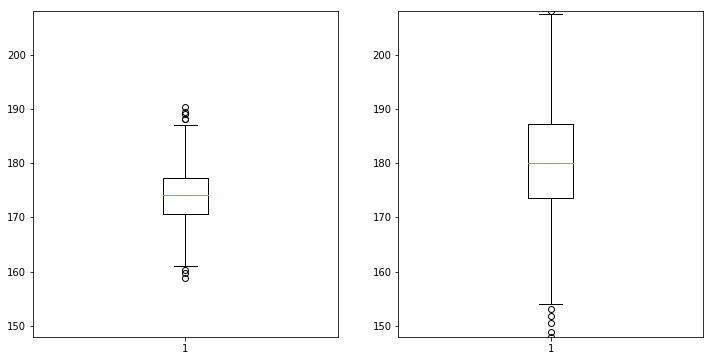

In [15]:
#Draw the boxplots
fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.ylim((min(np.concatenate((d1, d2), axis=0)),max(np.concatenate((d1, d2), axis=0))))
bp = plt.boxplot(d1)
plt.subplot(122)
bp = plt.boxplot(d2)
plt.ylim((min(np.concatenate((d1, d2), axis=0)),max(np.concatenate((d1, d2), axis=0))))
plt.show()

## Boxplot vs. Histogram
In this example we want to understand some of the characteristics of boxplots and histograms. For this, we use two simple set of data points and visualize them with a histogramm and with a boxplot.

In [17]:
data1 = np.array([0,2,2,2,3,4,4,4,5])
data2 = np.array([0,2,2,3,3,3,4,4,5])

The following figure shows the histogram (with minimum value 0, bin size 1) and the boxplot of both data samples.

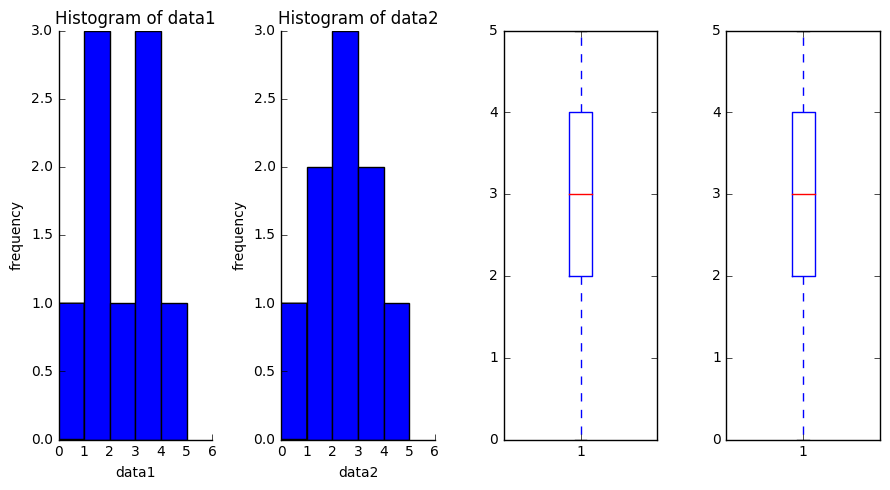

In [18]:
fig = plt.figure(figsize=(9,5))

# histogram of data1

ax = fig.add_subplot(141)
ax.hist(data1,bins= np.arange(0,6,1.0005), edgecolor = 'black')
plt.xlabel('data1')
plt.ylabel('frequency')
plt.title('Histogram of data1')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.get_xaxis().tick_bottom()   # remove unneeded ticks 
ax.get_yaxis().tick_left()

# histogram of data2
ax = fig.add_subplot(142)
ax.hist(data2,bins= np.arange(0,6,1.0005), edgecolor = 'black')
plt.xlabel('data2')
plt.ylabel('frequency')
plt.title('Histogram of data2')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.get_xaxis().tick_bottom()   # remove unneeded ticks 
ax.get_yaxis().tick_left()

#boxplot of data1
plt.subplot(1,4,3)
bp = plt.boxplot(data1)

#boxplot of data2
plt.subplot(1,4,4)
bp = plt.boxplot(data2)

fig.tight_layout()
plt.show()

Note that the boxplots are equal, that means for instance, that IQR and median are the same for both samples. Only the histogram shows that the data is actually different.

## Zipf Distribution

Let us now consider another distribution. Simply speaking, the Zipf distribution (also known as the zeta distribution) is a continuous probability distribution that satisfies Zipf’s law: the frequency of an item is inversely proportional to its rank in a frequency table.

Parameters:	
- a : float or array_like of floats. Distribution parameter. Should be greater than 1.
- size : int or tuple of intsOutput shape. 

In [22]:
a = 1.5 # parameter
size= 100
data = np.random.zipf(a,size)
data

array([  32,    1,    1,    1,    3,    3,    1,    1,   13,    1,    2,
          1,    1,    2,   11,    5,   36,    3,    1,    1,    2,    9,
          2,  340,    2,    1,    2,   23,    2,    1,    4,  136,    1,
          1,    4,    1,    7,    1,    3,    2,    3,    2,    1,    5,
          3,    4,    1,    2,    2,    1,    1,    2,    5,    1,    1,
          2,    1,    1,    1,    3,    6,    5,    1,    1,    2,    1,
          8,    1,    1,    2, 5049,    9,    2,    3,    1,  157,  120,
          4,    1,    1,   40,    3,    1,    5,    2,    7,    1,   13,
          1,    1,   11,    1,    1,   97,  168,    1,    1,    1,    1,
          1])

The figure below shows the statistics (mean, min, max, median, 1st quartile, 3rd quartile) of the sample of the Zipf distribution. Note, that if you run the above code multiple times, the data array will be different (after all, we just collecting a sample). 

In [23]:
metric_list = ["Min", "1st Qu.","Median", "Mean","3rd Qu.","Max"]
set_list = ["Statistics"]
dataset = np.array([min(data),np.percentile(data,25) ,np.percentile(data,50),mean(data), np.percentile(data,75), max(data)])
pandas.DataFrame(dataset,metric_list, set_list)

,Statistics
Min,1.00
1st Qu.,1.00
Median,2.00
Mean,64.38
3rd Qu.,5.00
Max,5049.00


The histogram and the boxplot of the Zipf distribution are plotted below.

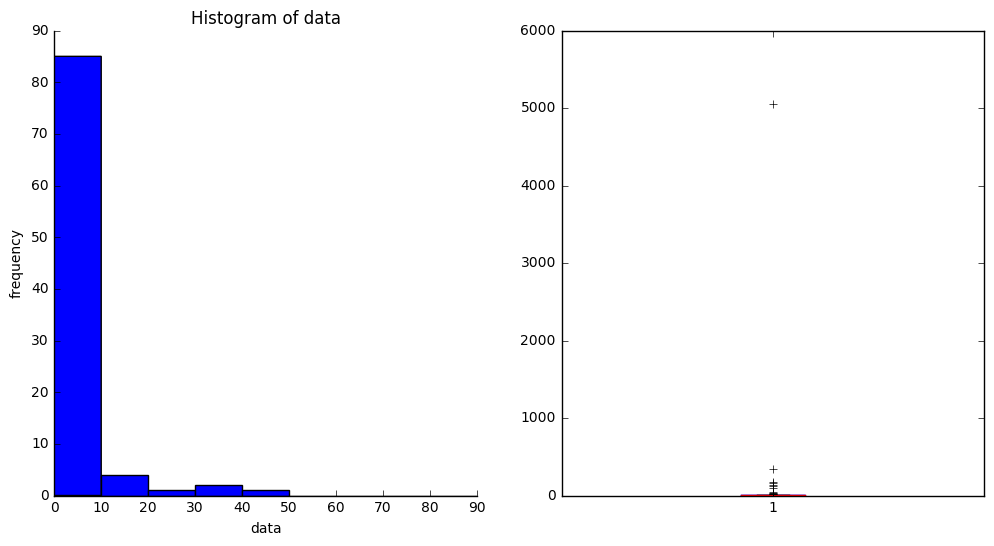

In [24]:
fig = plt.figure(figsize=(12,6))

# histogram of data

ax = fig.add_subplot(121)
ax.hist(data,bins= np.arange(0,100,10), edgecolor = 'black')
plt.xlabel('data')
plt.ylabel('frequency')
plt.title('Histogram of data')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.get_xaxis().tick_bottom()   # remove unneeded ticks 
ax.get_yaxis().tick_left()

#boxplot of data
plt.subplot(1,2,2)
bp = plt.boxplot(data)


plt.show()